# Evaluación de modelos

## Contenido
* Básicos de evaluación en modelos de aprendizaje supervisado
    * Error de entrenamiento y error de prueba
    * Error de generalización y validación cruzada
    * Selección del modelo
* Evaluación para modelos de regresión
    * Métodos gráficos
    * Métodos numéricos
    * Validación cruzada
    * Validación econométrica de supuestos para regresión lineal
* Evaluación para modelos de clasificación
* Evaluación para modelos de clustering

Se ocuparán las siguientes librerías.

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Básicos de evaluación
### Error de entrenamiento y error de prueba
El **error de entrenamiento** busca medir numéricamente lo bien que el modelo encaja en los datos con los que sus parámetros fueron estimados. 
  
El **error de prueba** busca medir numéricamente lo bien que el modelo encaja con datos nuevos.

### Error de generalización y validación cruzada
La evaluación dentro de la muestra nos dice lo bien que nuestro modelo se ajusta a los datos ya dados para entrenarlo. No nos da una estimación de lo bien que el modelo de entrenamiento puede predecir nuevos datos. Sin embargo, para poder medir el desempeño del nuevo con nuevos elementos es menester conocer el su verdadero valor.  La solución es dividir nuestros datos en datos de entrenamiento para entrenar el modelo y en datos de prueba para usar  como datos de fuera de la muestra los cuales se usan entonces para hacer una aproximación de cómo se comportaría el modelo en el mundo real. Cuando dividimos un conjunto de datos, normalmente la mayor parte de los datos se utiliza para el entrenamiento y una parte más pequeña para las pruebas. Por ejemplo, podemos utilizar el 70 por ciento de los datos para entrenamiento y el 30 por ciento de los datos para pruebas. Esta división se hará de manera aleatoria.
  
Usamos el **conjunto de entrenamiento** o training set para crear un modelo y descubrir relaciones de predicción. Después utilizamos un **conjunto de pruebas** o test set para evaluar el comportamiento del modelo. **Cuando hayamos terminado de probar nuestro modelo, debemos usar todos los datos para entrenar el modelo**.
  
Para dividir aleatoriamente un conjunto de datos df con variables predictoras col_1, col_2, ..., col_n y variable a predecir col_obj en conjuntos de entrenamiento x_train, y_train y conjuntos de prueba x_test, y_test en proporción $p$ para el entrenmiento y $1-p$ para prueba $(0 < p < 1 )$ utilice el siguiente código:  
`from sklearn.model_selection import train_test_split`  
`x_train, x_test, y_train, y_test = train_test_split(df[['','',...,'']], df['col_obj'], test_size = 1-p)`  
  
El **error de generalización** o generalization error es una medida de lo bien que nuestros datos predicen datos que no se han visto anteriormente. El error que obtenemos usando nuestros datos de prueba es una aproximación de este error. Cabe notar que al tomar diferentes combinaciones de conjuntos de entrenamiento y conjuntos de prueba, el error de generalización va a diferir entre uno y otro experimento. Para tener una idea más precisa de cuál es éste utilizaremos validación cruzada. 

  
La **validación cruzada** o cross validaton consiste en dividir el conjunto de datos en $k$ grupos iguales o con la misma cantidad de datos denominados folds. Algunos de ellos se usarán como conjuntos de entrenamiento y otros como conjutnos de prueba. Por ejemplo, podemos utilizar el 70 por ciento de los folds para entrenamiento y el 30 por ciento de los folds para pruebas. Esto se repite hasta que cada parte haya sido utilizada tanto como datos de entrenamiento como datos de prueba. Al final, utilizaremos el promedio del error como estimación del error de generalización. Este error a promediar puede ser alguna métrica numérica vista anteriormente como $MSE$ o $R^2$. 

  
Para hacer validación cruzada para un modelo de aprendizaje model con variables predictoras col_1,...,col_n y variable a predecir col_obj en una tabla df utilziando k folds mediante el método method use el siguiente código:  
`from sklearn.model_selection import cross_val_score`  
`x_data = df[['col_1'. 'col_2', ..., 'col_n']]`  
`y_data = df[['col_obj']]`  
`scores = cross_val_score (model, x_data, y_data, cv = k, scoring = 'method')`  

Una vez obtenido el vector de scores por validación cruzada puede obtener el promedio y la desviación estándar para darse una idea del error de generalización con el siguiente código:  
`np.mean(scores)`  
`np.std(scores)`


Más aún, si desea ver las predicciones realizadas para las diferentes combinaciones probadas en una validación cruzada para un modelo del tipo mtype con variables predictoras col_1,...,col_n y variable a predecir col_obj en una tabla df utilziando k folds, use el siguiente código:  
`from sklearn.model_selection import cross_val_predict`  
`yhat = cross_val_predict(mtype, df[['col_1'. 'col_2', ..., 'col_n']], df['col_obj'], cv = k)`  

### Selección del modelo
Entre un puñado de modelos que cumplan los supeustos sobre los cuales fueron construidos, se eligirá aquél que presenté un mejor score en validación cruzada en términos de medidas de bondad de ajuste y medidas de error.

## Evaluación para modelos de regresión
El objetivo de la regresión es crear un modelo para predecir con precisión un caso desconocido. Con este fin, tenemos que realizar una evaluación de regresión después de crear el modelo.

Para realizar el desarrollo del modelo se utilizará el siguiente conjunto de datos. Éste se encuentra preprocesado -no está normalizado- y se le ha aplicado un EDA que concluye que las variables que podrían ser buenos predictores de la variable objetivo price son width, curb_weight, engine_size, horsepower, city_mpg, highway_mpg, wheel_base, bore y drive_wheels.

In [3]:
path = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data/df_linear_regression.csv'
df = pd.read_csv(path)

### Métodos gráficos para visualización
Se trata de usar visualizaciones en orden de evaluar la validez del modelo.   
  
**Gráficas de regresión**  
Se busca verificar de manera visual que haya un comportamiento lineal entre los datos. Esto puede funcionar con una línea en el caso de una regresión con una variable explicativa o un plano con dos variables explicativas, pero no es posible visualizarlo para dimensiones más altas.
  
Para hacer una gráfica de regresión con la variable predictora col y la variable objetivo col_obj use el siguiente código:  
`import seaborn as sns`      
`x_data = df[['col']]`  
`y_data = df[['col_obj']]`  
`sns.regplot(x = x_data, y = y_data)`
  
**Gráficas de residuos**  
Se busca verificar de manera visual que los residuales tengan valor esperado cero. Se esperaría ver los residuales distribuidos uniformemente alrededor de la recta $y = 0$, con variación similar y sin curvaturas. Se puede visualizar para dimenisones altas.
  
Para hacer un gráfico de residuales de los valores predichos y_hat en contraste con los valores reales y_real use el siguiente código:   
`from sklearn.metrics import PredictionErrorDisplay`  
`res_plot = PredictionErrorDisplay(y_true = y_real, y_pred = y_hat)`  
`res_plot.plot()`  
  
**Graficos de distribución o histogramas**  
Se trata de una comparación del valor predicho con el valor real de tal manera que podremos ver el rango de valores a pronosticar donde se posee mayor precisión. En el caso de que la variable dependiente sea continua tenemos una distribución y en caso de que la variable dependiente sea discreta tendremos un histograma. Se puede visualizar para dimensiones altas. Cabe notar que esto se puede hacer de tres maneras:
* Para todos los datos  
Se hace una comparación del valor predicho de todos los datos respecto al valor real de estos, en términos de distribución.
* Para el conjunto de datos de entrenamiento  
Se hace una comparación del valor predicho de los datos del conjunto de entrenamiento respecto al valor real de estos, en términos de distribución.
* Para el conjutno de datos de prueba  
Se hace una comparaciñon del valor predicho de los datos del conjutno de prueba respecto al valor real de estos, en términos de distribución.  
  
Para hacer un gráfico de distribución de los valores predichos y_hat en contraste con los valores reales y_real con la variable objetivo con nombre 'col_obj' use el siguiente código:  
`def DistributionPlot(y_real, y_hat, col_obj, title):`  
`    y_hat = pd.DataFrame(y_hat, columns = [col_obj])`  
`    y_hat['Distribution'] = 'predicted'`  
`    y_real['Distribution'] = 'real'`  
`    df_aux = df_aux = pd.concat([y_real, y_hat], axis = 0)`  
`    sns.displot( data = df_aux, x = col_obj,  hue = 'Distribution', kind = 'kde')`  
`    plt.title(title)`  
`DistributionPlot(y_data, y_hat, 'col_obj', 'title')`

Gráfico de regresión

<Axes: xlabel='engine-size', ylabel='price'>

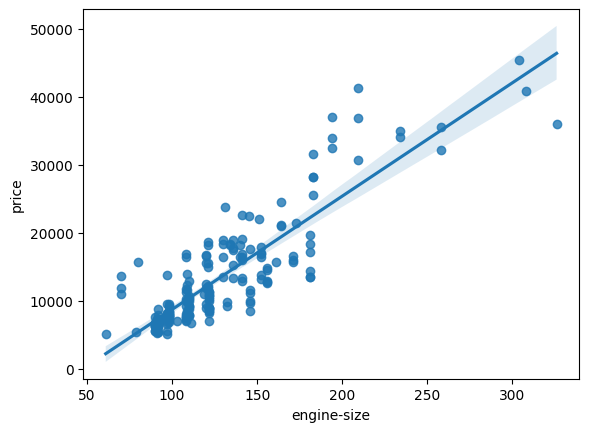

In [4]:
# Gráficas de regresión
x_data = df[['engine_size']]
y_data = df[['price']]
sns.regplot(x = x_data, y = y_data)

Gráfico de residuales

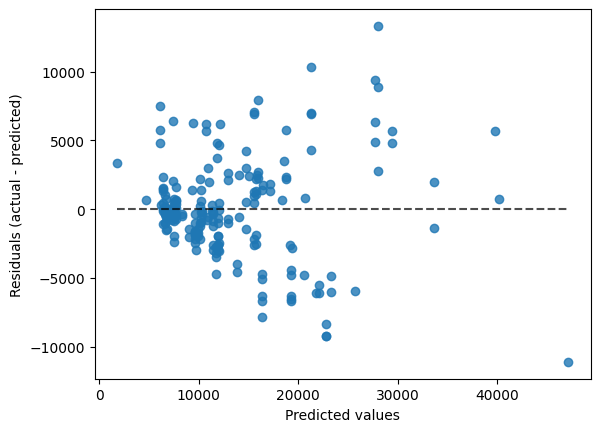

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
x_data = df[['engine_size', 'horsepower']]
y_data = df['price']
lm = LinearRegression()
lm.fit(x_data, y_data)
yhat = lm.predict(x_data)
res_plot = PredictionErrorDisplay(y_true = y_data, y_pred = yhat)
res_plot.plot()

Gráfico de distribución

In [19]:
# Función de gráfico de distribución
def DistributionPlot(y_real, y_hat, col_obj, title):
    y_hat = pd.DataFrame(y_hat, columns = [col_obj])  
    y_hat['Distribution'] = 'predicted'
    y_real['Distribution'] = 'real'
    df_aux = pd.concat([y_real, y_hat], axis = 0)
    sns.displot( data = df_aux, x = col_obj,  hue = 'Distribution', kind = 'kde')
    plt.title(title)

/var/folders/_l/hr_b1mld5mn0864wf5l7qd5r0000gp/T/ipykernel_92959/2872183062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_real['Distribution'] = 'real'


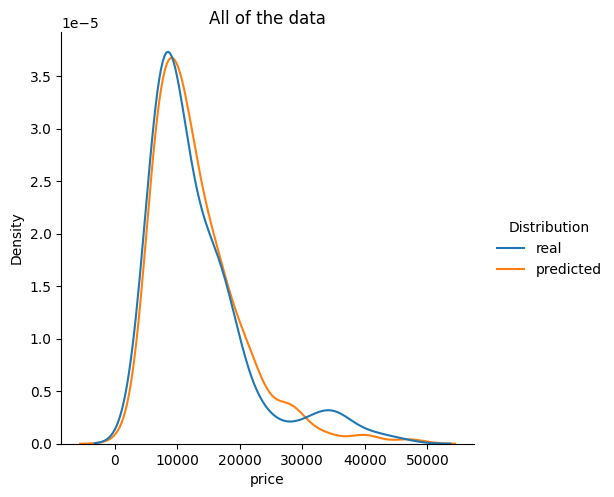

In [20]:
# Gráfico de distribución utilziando todos los datos
from sklearn.linear_model import LinearRegression
x_data = df[['engine_size', 'horsepower']]
y_data = df[['price']]
lm = LinearRegression()
lm.fit(x_data, y_data)
yhat = lm.predict(x_data)
DistributionPlot(y_data, yhat, 'price', 'All of the data')

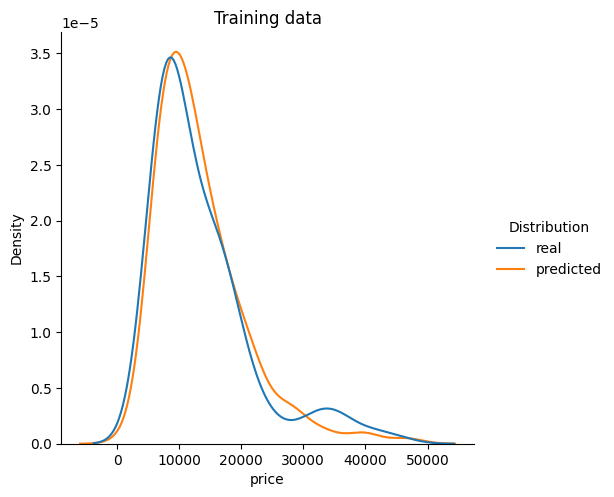

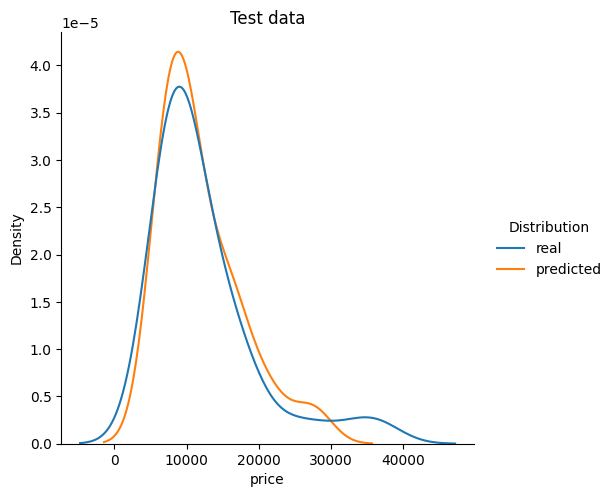

In [16]:
# Gráfico de distribución utilziando los datos de entrenamiento y los datos de prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_data = df[['engine_size', 'horsepower']]
y_data = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)
DistributionPlot(y_train, yhat_train, 'price', 'Training data')
DistributionPlot(y_test, yhat_test, 'price', 'Test data')

### Métodos numéricos para evaluación
Se trata de usar números en orden de evaluar la validez del modelo. Cabe notra que hay tres fromas de aplicar éatas métricas:
* Para todos los datos  
* Para el conjunto de datos de entrenamiento  
* Para el conjutno de datos de prueba  
Se hace una comparaciñon del valor predicho de los datos del conjutno de prueba respecto al valor real de estos, en términos de distribución.  


**$MSE$ (Mean Squared Error)**  
Se trata de una medida para de eroor  dada por el  promedio del cuadrado de la diferencia de los valores pronosticados con los valores reales en orden de obtener el error cuadrático medio. Esto es:  
$MSE = \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2 = \frac{1}{n}\sum_{i=1}^n \epsilon_i^2$
  
Se busca que éste sea lo más pequeño posible, tomando en cuenta la magnitud de los datos.  
  
**$R^2$ (Coeficiente de determinación)**  
Se trara de una medida de bondad de ajuste que nos da una noción de qué tan bien se ajusta la línea de regresión a los datos. Esta medida $0\leq R^2\leq 1$ se da como sigue:  
$R^2 = \frac{SCE}{SCT} = 1-\frac{SCR}{SCT} = \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2\sum_{i=1}^{n}y_i^2}$  
donde 
* SCE es la suma de cuadrados total dada por $\sum_{i=1}^n(y_i-\bar{y})^2$.
* SCE es la suma de cuadrados explciados dada por $\sum_{i=1}^n(\hat{y}_i-\bar{y})^2$
* SCE es la suma de cuadrados residuales dada por $\sum_{i=1}^n\epsilon^2$.
* SCT = SCE + SCR
  
Aquí $R^2 \approx 0$ nos indica un ajuste paupérrimo y $R^2 \approx 1$ nos indica un ajuste perfecto, mientras que  $R^2 <0$ indica un sobreajuste. 

In [4]:
from sklearn.model_selection import train_test_split
x = df[['engine_size']]
y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)  

In [5]:
## MSE y R^2 aplicado a todos los datos
# Definción del modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)
yhat = lm.predict(x)
# Obtención de MSE y R^2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)
print('MSE: ', mse)
print('R^2: ', r2)

MSE:  15021126.025174143
R^2:  0.7609686443622008


In [6]:
## MSE y R^2 aplicado al conjunto de entrenamiento
# Definción del modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
# Obtención de MSE y R^2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_train, yhat_train)
r2 = r2_score(y_train, yhat_train)
print('MSE: ', mse)
print('R^2: ', r2)

MSE:  16741710.16071983
R^2:  0.7623647497684445


In [7]:
## MSE y R^2 aplicado al conjunto de prueba
# Definción del modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_test, y_test)
yhat_test = lm.predict(x_test)
# Obtención de MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)
print('MSE: ', mse)
print('R^2: ', r2)
print(score)

MSE:  9726127.776816463
R^2:  0.7760859563928192
0.7760859563928192


### Validación cruzada

Para regresión podemos utilziar diferentes  métricas en la validación cruzada. Si bien los más usuales son $R^2$ y $MSE$, los métodos disponibles en scikit-learn para evaluación de regresión son los que siguen:  
* ‘explained_variance’ 
* ‘max_error’ metrics.max_error
* ‘neg_mean_absolute_error’
* ‘neg_mean_squared_error’
* ‘neg_root_mean_squared_error’
* ‘neg_mean_squared_log_error’
* ‘neg_root_mean_squared_log_error’
* ‘neg_median_absolute_error’
* ‘r2’
* ‘neg_mean_poisson_deviance’
* ‘neg_mean_gamma_deviance’
* ‘neg_mean_absolute_percentage_error’
* ‘d2_absolute_error_score’
* ‘d2_pinball_score’
* ‘d2_tweedie_score’
  
Estos srting deberán ser dados en el parámetro `scoring` cuando se ejecute el código de validación cruzada. Para hacer una validación cruzada respecto al modelo model con variables predictoras col_1,col_2,...,col_n y variable objetivo col_obj con k folds y el método method use el siguiente código:  
`from sklearn.model_selection import cross_val_score`  
`x_data = df[['col_1'. 'col_2', ..., 'col_n']]`  
`y_data = df[['col_obj']]`  
`scores = cross_val_score (model, x_data, y_data, cv = k, scoring = 'method')`  
  
Una vez obtenido el vector de scores por validación cruzada puede obtener el promedio y la desviación estándar para darse una idea del error de generalización con el siguiente código:  
`np.mean(scores)`  
`np.std(scores)`


In [4]:
# Definción del modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [8]:
# Score de validación cruzada utilizando r^2
from sklearn.model_selection import cross_val_score
x_data = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]
y_data = df[['price']]
R2_cross = cross_val_score(lm, x_data, y_data, cv=5, scoring = 'r2')
print("The mean of the folds are", R2_cross.mean(), "and the standard deviation is" , R2_cross.std())

The mean of the folds are 0.5465506228154055 and the standard deviation is 0.27760090661451453


In [24]:
# Score de validación cruzada utilizando la raíz del MSE
from sklearn.model_selection import cross_val_score
x_data = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]
y_data = df[['price']]
sqrtMSE_cross = -cross_val_score(lm, x_data, y_data, cv = 5, scoring = 'neg_root_mean_squared_error')
print("The mean of the folds are", sqrtMSE_cross.mean(), "and the standard deviation is" , sqrtMSE_cross.std())

The mean of the folds are 4075.6154953049627 and the standard deviation is 338.8191249671338


### Validación econométrica de supuestos para regresión lineal
Una regresión lineal dada por $Y = X\bar{\beta} + U$ donde $X\in M_{m\times n (\mathbb{R})}$ es una matriz que consiste en un arreglo de una muestra con $n$ variables que describen $m$ elementos y $\bar{\beta} = (\beta_0,\beta_1,...,\beta_n)$ son sus parámetros a estimar, debe cumplir con los siguientes supuestos:  

**Supuesto 1. Correcta especificación**    
La relación entre las variables independientes  y la variable dependiente  debe estar dada por $Y = X\beta + U$ y debe ser lineal en parámetros. Si la especificción es incorrecta para $Y$, entonces todo lo demás carece de sentido.  
  
**Supuesto 2. Rango completo o no multicolinealidad**  
No existe una relación lineal entre las variables independientes. Esto es $X\in M_{m\times n (\mathbb{R})}$ es tal que $rango(X) = k+1$. O bien, $X$ es tal que sus renglones o columnas son linealmente independientes. Note que de este modo $\exists (X^{t}X)^{-1}$.  
  
**Supuesto 3. Ortogonalidad**  
$\mathbb{E}(U_i) = 0$ $(1\leq i \leq n)$. Esto es, para cada valores de $X_{1,i}, X_{2,i},..., X_{n,i}$, la perturbación tomará distintos valores de forma aleatoria, pero no tomará sistemáticamnete valores positivos o negativos, sino que se supone que tomará algunos positivos y otros negativos de tal forma que su valor esperado sea cero.  
  
**Supuesto 4.Homocedasticidad**  
$Var(U_j) = \sigma^2$ para un $\sigma^2\in\mathbb{R}$ y para toda $U_i$ $(1\leq j \leq m)$. Esto es, los errores (entenidos como v.a.) tienen varianza constante, auqnue desconocida.  
  
**Supuesto 5. No autocorrelación**  
$Cov(U_k,U_l)=0$ o $\mathbb{E}(U_i, U_j) = 0$ $(1\leq l\not = l \leq m)$. Esto es, el valor de la perturbación para cualqueir observación muestral no viene influenciada por los valores de las perturbaciones correspondientes a otras observaciones muestrales. De este modo, el saber el error en $k$ no sirve para inferir el valor en $l$.  

**Principio de parsimonia**  
Un modelo parsimonioso es aquel que tiene el mínimo de variables explcativas pero el máximo poder explicativo. En ortras palabras, que tiene el número de variables predictoras preciso para explicar la variable a predecir en cuestión; ni más, ni menos. 
  
Nota:  
En orden de poder escribir la especificación como $Y = X\beta + U$ se agrega a $X$ una columna con $\bar{1}_m$.

#### stsatsmodels
En orden de hacer estas validaciones de supuestos se utilizará el paquete `statsmodels`. statsmodels es una librería de Python que provee clases y funciones para la exploración estadística de datos, la estimación de diferentes modelos estadísticos y la realización de pruebas estadísticas.

Para importar statsmodels

In [1]:
import statsmodels

Para ver la versión de `statsmodels`

In [4]:
statsmodels.__version__

'0.14.1'

Se necesitarán las siguientes librerías.

In [37]:
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Para estimar un modelo de regresión lineal por mínimos cuadrados ordinarios entre las variables predictoras col_1,...,col_n y la variable objetivo col_obj y ver sus resultados:   
1. Importar las herramientas requeridas.  
`import statsmodels.api as sm`  
`import statsmodels.formula.api as smf`  
2. Estimar el modelo.  
`lm = smf.ols('col_obj ~ col_1 + ... + col_2', data = df).fit()`   3. Ver resultados.  
`print(lm.summary())`  

In [31]:
# Importar herramientas requeridas
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Estimar el modelo
lm = smf.ols('price ~ engine_size + horsepower', data = df).fit()

In [5]:
# Obtener resumen del modelo
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     366.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.07e-67
Time:                        17:30:50   Log-Likelihood:                -1934.3
No. Observations:                 201   AIC:                             3875.
Df Residuals:                     198   BIC:                             3885.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8539.9570    845.275    -10.103      

**Vaidación de supuesto 1: Correcta especificación**  
Para validar el supuesto de correcta especificación, analice la linealidad de las variables predictoras respecto la variable a predecir mediante graficas de regresión y coeficientes de correlación de Pearson.  
  
Para obtener el coeficiente de  correlación entre dos columnas col y la columna de variable objetivo col_obj con su respectivo p-value:  
`import scipy as sc`  
`corr_coef, p_value = sc.stats.pearsonr(df['col'], df['col_obj'])` 
  
Para obtener un gráfico de regresión entre dos columnas col y la columna de variable objetivo col_obj:  
`import seaborn as sns`  
`sns.regplot(x = df['col'], y = df['col_obj'])`  

**Validación del supuesto 2: Rango completo o no colinealidad**  
Dada una muestra de $m$ elementos respecto a $n$ variables col_1,...,col_n en una tabla df que forman una matriz $X\in\mathcal{M}_{m\times n}$, veamos que sus columnas son linealmente independientes o que $rank(X) = m$ mediante el siguiente código:  
`data = df[['col_1',...,'col_n']].to_numpy`  
`np.linalg.matrix_rank(data)`  

Podemos utilizar el número de condición de $X^tX$ $cond(X^tX)$ e interpretarlo como sigue:  
* Si $cond(X^tX)<100$, entonces podemos decir que el problema de multicolinealidad no es relevante. 
* Si $100 \leq cond(X^tX) \leq 1000$, entonces podemos decir que el problema de multicolinealidad es de moderado a fuerte. 
* Si $cond(X^tX)>1000$, entonces podemos decir que el problema de multicolinealidad no es severo. 
  
Es posible que esto no sea como es deseado. Si es el caso, vea si las variables explicativas están altamente correlacionadas en orden de suprimir una. Para esto use el siguiente código:
`df.corr()`  

**Validación del supuesto 3: Ortogonalidad**  
Se supone que $\epsilon\sim N(0,\sigma^2)$. Hay diferentes pruebas de hipótesis o crierios para analizar la normalidad de un conjunto de datos y todas manejan consideraciones específicas. Algunas de ellas son D'Agostino's K-squared test, Jarque–Bera test, Anderson–Darling test, Cramér–von Mises criterion, Kolmogorov–Smirnov test, Lilliefors test, Shapiro–Wilk test y el Pearson's chi-squared test.
Para este propóstio se suelen usar la Shapiro–Wilk, Anderson-Darling y la Jarque-Bera. Así mismo, se suele apoyarse gráficamente de una qqplot y de una gráfica de distribución. 

* Shapiro-Wilk  
Se busca hacer la siguiente prueba de hipótesis:
$$H_0: \text{La muestra viene de una distribución normal} \text{  vs.  } H_1: \text{La muestra no viene de una distribución normal}$$
Se espera un valor $p$ alto en orden de no oder rechazar la hipótesis nula. Para obtener el valor $p$ requerido dado el modelo estimado lm use el siguiente código:  
`from scipy.stats import shapiro`  
`residuos = lm.resid`  
`stat, p_value = shapiro(residuos)`  
`print(p_value)`  

* qqplot  
Se busca ver que la qqplot de los residuos estandarizados estén lo más cercanos posible a la identidad.  
Para obtener el gráfico en cuestión utilice el siguiente código:  
`import statsmodels.api as sm`  
`def qqplot_residuals(lm):`  
`    residuos = lm.resid`  
`    residuos = (residuos - np.mean(residuos))/np.std(residuos)`  
`    sm.qqplot(data, line='45')`  
`qqplot_residuals(lm)`  
  
* Gráfica de distribución  
Se busca que el histograma de los residuos sea lo más parecidos a la gráfica de una distribución normal.  
Para obtener el gráfico en cuestión utilice el siguiente código:   
`import statsmodels.api as sm`  
`def normal_residuals_plot(lm):`  
`    residuos = lm.resid`  
`    residuos = (residuos - np.mean(residuos))/np.std(residuos)`  
`    residuos = pd.DataFrame(residuos, columns = ['sample'])`  
`    residuos['Distribution'] = 'Standarized Residuals Distribution'`  
`    nsample_std = np.random.normal(0,1,len(residuos))`  
`    nsample_std = pd.DataFrame(nsample_std, columns = ['sample'])`  
`    nsample_std['Distribution'] = 'Normal Standard Distribution'`  
`    df_aux = pd.concat([residuos, nsample_std], axis = 0)`  
`    sns.displot( data = df_aux, x = 'sample',  hue = 'Distribution', kind = 'kde')`  
`normal_residuals_plot(lm)`  

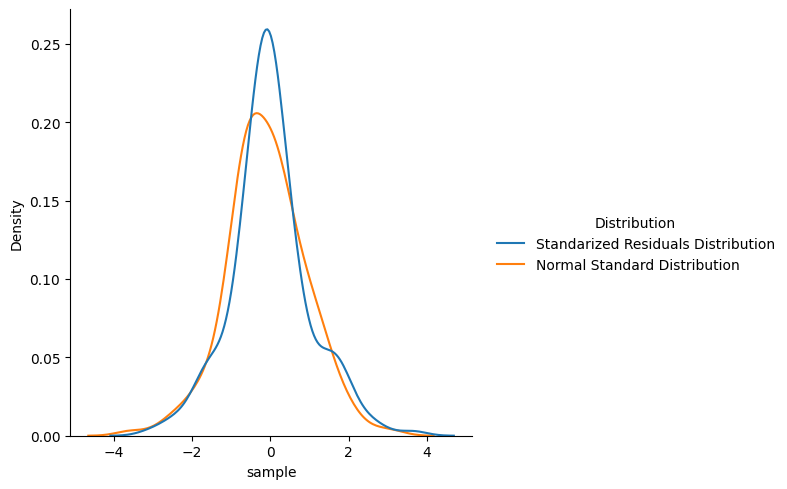

In [67]:
# Gráfico de distribución
def normal_residuals_plot(lm):
    residuos = lm.resid
    residuos = (residuos - np.mean(residuos))/np.std(residuos)
    residuos = pd.DataFrame(residuos, columns = ['sample'])
    residuos['Distribution'] = 'Standarized Residuals Distribution'
    nsample_std = np.random.normal(0,1,len(residuos))
    nsample_std = pd.DataFrame(nsample_std, columns = ['sample'])
    nsample_std['Distribution'] = 'Normal Standard Distribution'
    df_aux = pd.concat([residuos, nsample_std], axis = 0)
    sns.displot( data = df_aux, x = 'sample',  hue = 'Distribution', kind = 'kde')
normal_residuals_plot(lm)

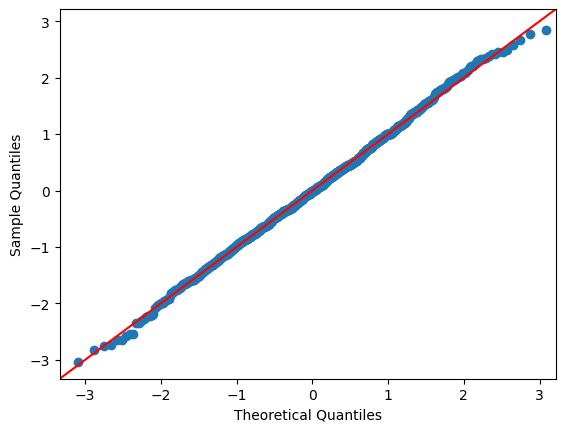

In [71]:
# qqplot
def qqplot_residuals(lm):
    residuos = lm.resid
    residuos = (residuos - np.mean(residuos))/np.std(residuos)
    sm.qqplot(data, line='45')
qqplot_residuals(lm)

In [78]:
# Prueba Shapiro-Wilk
from scipy.stats import shapiro
residuos = lm.resid
stat, p_value = shapiro(residuos)
print(p_value)

0.00024035494425334036


**Validación del supuesto 5: Homocedastidad**
Para esto se utiliza la prueba Breush-Pagan que consiste en la siguiente prueba de hipótesis:
$$H_0:\text{Existe homocedasticidad} \text{  vs.  } H_1:\text{Existe heterocedasticidad}$$
Se espera un valor $p$ alto en orden de no oder rechazar la hipótesis nula. Para obtener el valor $p$ requerido dado el modelo estimado lm use el siguiente código:  
`from statsmodels.stats.diagnostic import het_breuschpagan`  
`residuales = lm.resid`  
`_, p_value, _, _ = het_breuschpagan(residuales, lm.model.exog)`  
`print(p_value)`  

**Validación del supuesto 6: No autocorrelación**
Para esto se utiliza la prueba Durbin-Watson . El estadístico de prueba $DW$ se define como sigue:
$$DW = \frac{\sum_{i=2}^m (\epsilon_{i} - \epsilon_{i-1})^2}{\sum_{i=1}^m \epsilon_i^2}$$
Para valores grandes de $m$, $DW$ tiende a $2*(1-\rho)$ donde $\rho$ es la autocorrelación de los residuales. Po un lado, para valores de $\rho=0$, lo que indica no autocorrelación, $DW\approx 2$, lo que es deseado. Por otro lado, $0\leq DW \leq 4$ de modo que $DW\approx 0$ indica evidencia de autocorrelación positiva y $DW\approx 4$ indica evidencia de autocorrelación negativa, lo que no es deseado.  
Para calcular el estadístico en cuestión, $DW$, para los residuales del modelo lm utilice el siguiente código:   
`from statsmodels.stats.stattools import durbin_watson`  
`residuales = lm.resid`  
`DW_stat = durbin_watson(residuales)` 
`print(DW_stat)`

**Principio de parsimomia**  
Para ver esto podemos tomar en cuenta las siguientes consideraciones. 

* Prueba de significancia individual  
Se trata de evaluar la significancia estadística de cada una de las variables predictoras. Esto es, para el modelo $y_i = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ someter a cada $\beta_i$ $1\leq i \leq n$ a la siguiente prueba de hipótesis:
$$H_0:\beta_i = 0 \text{  vs.  } H_1:\beta_i \not= 0$$
Para obtener los valores $p$ observe el apartado `P>|t|` en `lm.summary()` una vez que el modelo lm esté estimado. Se requiere tener un valor $p$ lo suficientemente bajo como para rechazar la hipótesis nula.

* Pruebas de significancia conjunta  
Se trata de evaluar la significancia estadística de todas las variables predictoras. Esto es, para el modelo $y_i = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ someter a todas las $\beta_i$ $1\leq i \leq n$  a las siguiente prueba de hipótesis:
$$H_0:\beta_1=\beta_2=...=\beta_n=0 \text{  vs.  } H_1:\sum_{i=0}^n \beta_i^2 \not= 0$$
Para obtener los valores $p$ observe el apartado `Prob (F-statistic)` en `lm.summary()` una vez que el modelo lm esté estimado. Se requiere tener un valor $p$ lo suficientemente bajo como para rechazar la hipótesis nula.

* $R^2$ ajustada  
Al aumentar el número de variables explicativas en una especificación, aún si éstas resultatran irrelevantes, la medida de bondad de ajuste $R^2$ solo podría quedarse igual o aumentar. Esto no es bueno, sino que podría ser señal de sobreajuste en el que las variables extra solo se adaptan al ruido del conjunto de datos particular. Así pues, $R^2$ ajustada es una medida de bondad de ajuste sensible a la cantidad de variables explicativas del modelo de tan suerte que penaliza que existan demasiadas de éstas. Se define $R^2$ ajustada para un modelo con $m$ observaciones de $n$ variables como sigue:
$$1-\frac{(1-R^2)(m-1)}{m-n-1}$$
Para obtener los valores de $R^2$ y $R^2$ ajustada observe el apartado `R-squared` y `Adj. R-squared` en `lm.summary()` una vez que el modelo lm esté estimado. $R^2$ se interpreta de la misma forma que $R^2$, pero tomando la consideración de penalziación por variables extra que potencialmente no aportan a la explicación del fenómeno en cuestión sino a la captura del ruido en la muestra.

**Nota: p-value**  
El **valor $p$** nos muestra la probailidad de haber obtenido el resultado dado suponiendo que la hipótesis nula es cierta.  Se rechaza la hipótesis nula $H_0$ si el valor $p$ asociado al resultado observado es igual o menor que un nivel de significancia $\alpha$ establecido. Convencionalmente es $0.1, 0.05, 0.01$. Así pues, si $p\leq \alpha$, entonces se rechaza $H_0$. O bien, se rechaza la hipótesis nula para valores bajos de $p$ mientras que valores altos de la misma no permiten hacerlo. 

## Evaluación para modelos de clasificación binarios
Para evaluar el modelo o explicar su rendimiento, comparamos los valores reales respecto a los valores pronosticados por el el modelo. Esto se puede hacer de diversas maneras, pero es usual utilizar el paradigma de división del conjunto de datos en conjunto de entrenamiento y conjunto de prueba y hacer las evaluaciones sobre el conjunto de prueba. 


**Accuracy**  
Definimos accuracy como la cantidad de aciertos en clasifiación del algoritmo sobre el la cantidad de elementos a clasificar. Podría ser tóxica en casos imbalanceados.  
$ACC = \frac{\text{Clasificaciones correctas}}{\text{Total de clasificaciones}}$  
Note que $0\leq ACC \leq 1$. Para valores $ACC\approx 1$ diremos que el algortimo tiene un gran desempeño y para valores $ACC\approx 0$ diremos que el algoritmo tiene un pobre desempeño. 

Para obtener accuracy dado que se tiene el conjunto de valores reales y_data y el conjunto de predicciones yhat use el siguiente código:  
`from sklearn import metrics`  
`metrics.accuracy_score(y_data, yhat)`  
  
**Matriz de confusión**  
Dado un problema de claisificción binario con dos clases 1,0 definimos matriz de confusión como el arreglo que tiene las siguientes cuentas:  
* Verdaderos positivos (TP): pronosticados 1 que son realmente 1.
* Falsos positivos (FP): pronosticados 1 que son realmente 0.
* Verdaderos negativos (TN): pronosticados 0 que son realmente 0.
* Falsos negativos (FN): pronosticados 0 que son realmente 1.
  
Para obtener la confussion matrix [[TP, FN],[FP,TN]] dado que se tiene el conjunto de valores reales y_data y el conjunto de predicciones yhat use el siguiente código:  
`from sklearn import metrics`  
`metrics.confusion_marix(y_data, yhat)`

Para obtener una visualización de la matriz de confusión [[TP, FN], [FP, TN]] dado un modelo entrenado model con el conjunto de datos x_data, y_data t use el siguiente código:  
`from sklearn import metrics`  
`metrics.ConfusionMatrixDisplay.from_estimator(model, x_data, y_data)`  
O bien, si tiene el conjunto de valores reales y_data y el conjunto de predicciones yhat use el siguiente código:  
`metrics.ConfusionMatrixDisplay.from_predictions(y_data, yhat)`  
  
**Precision**  
Un precision más alto lleva a cometer menos falsos positivos. Es especialmente útil cuando el costo de los falsos positivos (error tipo I) es alto y se busca minimizarlos. Por ejemplo, evitar  decirle a un sano que está enfermo. 
$PREC = \frac{TP}{TP + FP}$  
  
Para obtener accuracy dado que se tiene el conjunto de valores reales y_data y el conjunto de predicciones yhat use el siguiente código:  
`from sklearn import metrics`  
`metrics.precision_score(y_data, yhat)`  
  
**Recall**  
Un recal más alto lleva a cometer menos falsos negativos. Es especialmente útil cuando el costo de los falsos negativos (error tipo II) es alto y se busca minimizarlos. Por ejemplo, evitar decirle a un enfermo que está sano.  
$REC = \frac{TP}{TP+FN}$  
  
Para obtener accuracy dado que se tiene el conjunto de valores reales y_data y el conjunto de predicciones yhat use el siguiente código:  
`from sklearn import metrics`  
`metrics.recall_score(y_data, yhat)`  
  
**F1 score**    
Es el promedio armónico entre precision y recall. Es una buena forma de evaluar que un clasificador tenga buen desempeño tanto en presición como en recall con una sola métrica.  
$F1 = 2\frac{PREC + REC}{PREC * REC}$  
Note que $0\leq F1 \leq 1$. Para valores $F1\approx 1$ diremos que el algortimo tiene un gran desempeño y para valores $F1\approx 0$ diremos que el algoritmo tiene un pobre desempeño. 
  
Para obtener accuracy dado que se tiene el conjunto de valores reales y_data y el conjunto de predicciones yhat use el siguiente código:  
`from sklearn import metrics`  
`metrics.f1_score(y_data, yhat)` 

**Classification report**  
O bien, para obtener estas métricas (precision, recall , f1-score con ) puede obtener un reporte general como sigue:  
`from sklearn.metrics import classification_report`  
`print(classification_report(y_data, yhat))`  
  
**Log-Loss**  
Se trata de un método de evaluación para un clasificador que además arroja una probabilidad de acierto. 
  
Para obtener Log-Loss dado que se tiene el conjunto de valores reales y_data y el conjunto de predicciones de probabilidad  yhat_proba use el siguiente código:  
`from sklearn.metrics import log_loss`  
`log_loss(y_test, yhat_prob)`  



## Evaluación para modelos de clasificación multiclase

In [22]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
